# Backstepping

In [222]:
import numpy as np
import matplotlib.pyplot as plt

In [223]:
T_STEP = 0.01
SIM_TIME = 10
VAR = 10

### System Definition

<center>

$\dot{x_1} = x_1^2 + x_2$\
$ \dot{x_2}  = u$

</center>

In [224]:
class System():

    def __init__(self, x1=0, x2=0):
        self.x1_init = x1
        self.x2_init = x2
        self.x1 = x1
        self.x2 = x2
        self.dx1 = 0
        self.dx2 = 0

    def __call__(self, u):
        self.dx1 = self.x1*self.x1+self.x2
        self.dx2 = u
        self.x1 += self.dx1*T_STEP
        self.x2 += self.dx2*T_STEP
        return self.x1, self.x2
    
    def reset(self):
        self.x1 = self.x1_init
        self.x2 = self.x2_init

In [225]:
sys = System(np.random.randn()*VAR, np.random.randn()*VAR )
print(f'Initial states : \n\tx1 = {sys.x1}\n\tx2 = {sys.x2}')

Initial states : 
	x1 = 3.375520234806124
	x2 = 18.400478592829188


In [226]:
sys.reset()

t = []
x1 = []
x2 = []

for i in range(int(SIM_TIME/T_STEP)):
    t.append(i*T_STEP)
    a,b = sys(0)
    x1.append(a)
    x2.append(b)

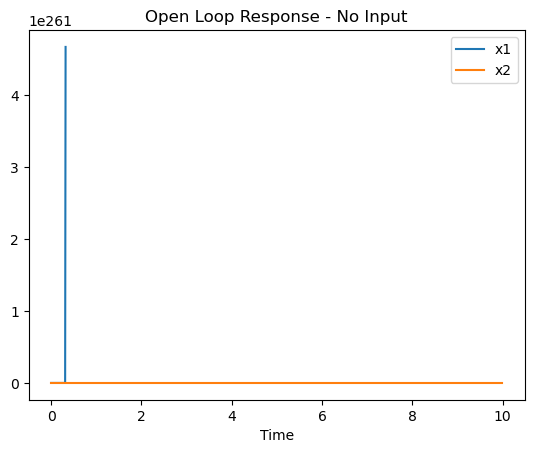

In [227]:
plt.plot(t,x1)
plt.plot(t,x2)
plt.title("Open Loop Response - No Input")
plt.xlabel("Time")
plt.legend(["x1","x2"])
plt.show()

## Sequential Backstepping Control

In [228]:
k1 = 2
k2 = 2

def eta(x1, x2):
    return -(2*x1+k1)*(x1*x1+x2)

xr = 1

In [229]:
sys.reset()

t = [0]
x1 = [sys.x1]
x2 = [sys.x2]
e1 = [sys.x1-xr]
u1 = [-x1[0]*x1[0]-k1*e1[0]]
e2 = [sys.x2-u1[0]]

for i in range(1, int(SIM_TIME/T_STEP)):
    t.append(i*T_STEP)
    u = eta(x1[i-1], x2[i-1]) - k2*e2[i-1]

    a,b = sys(u)
    x1.append(a)
    x2.append(b)

    e1.append(x1[i]-xr)
    u1.append(-x1[i]*x1[i]-k1*e1[i])
    e2.append(x2[i]-u1[i])

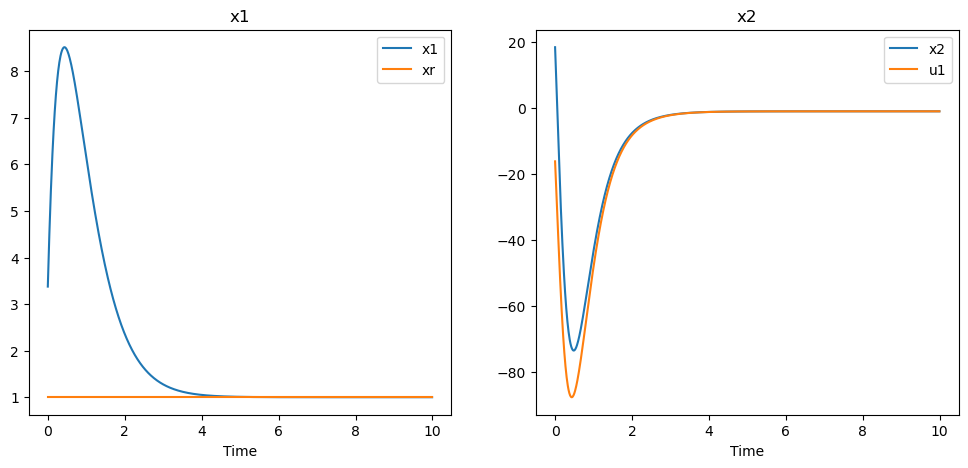

In [230]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("x1")
plt.xlabel("Time")
plt.plot(t,x1)
plt.plot(t,[xr]*len(t))
plt.legend(["x1", "xr"])

plt.subplot(1,2,2)
plt.title("x2")
plt.xlabel("Time")
plt.plot(t,x2)
plt.plot(t,u1)
plt.legend(["x2", "u1"])
plt.show()

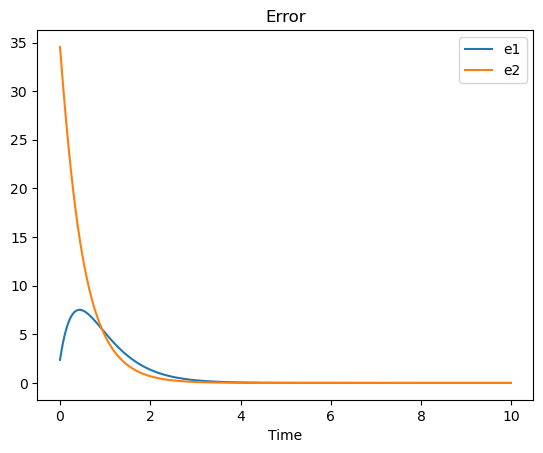

In [231]:
plt.title("Error")
plt.plot(t,e1)
plt.plot(t,e2)
plt.xlabel("Time")
plt.legend(["e1","e2"])
plt.show()

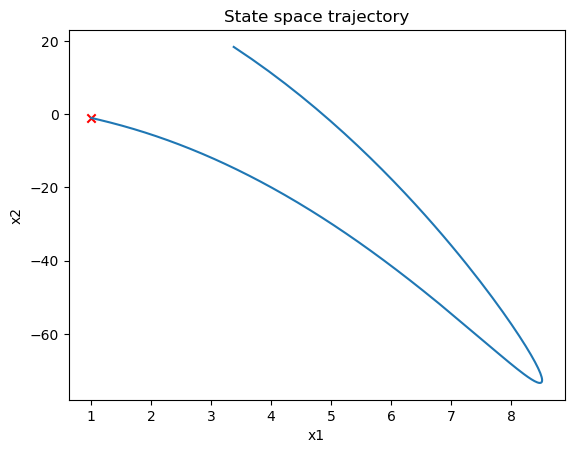

In [232]:
plt.title("State space trajectory")
plt.plot(x1,x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(x1[-1], x2[-1], c='r', marker='x')
plt.show()

## Backstepping via Lyapunov Methods

In [233]:
sys.reset()

t = [0]
x1 = [sys.x1]
x2 = [sys.x2]
e1 = [sys.x1-xr]
u1 = [-x1[0]*x1[0]-k1*e1[0]]
e2 = [sys.x2-u1[0]]

for i in range(1, int(SIM_TIME/T_STEP)):
    t.append(i*T_STEP)
    u = eta(x1[i-1], x2[i-1]) - k2*e2[i-1] - e1[i-1]

    a,b = sys(u)
    x1.append(a)
    x2.append(b)

    e1.append(x1[i]-xr)
    u1.append(-x1[i]*x1[i]-k1*e1[i])
    e2.append(x2[i]-u1[i])

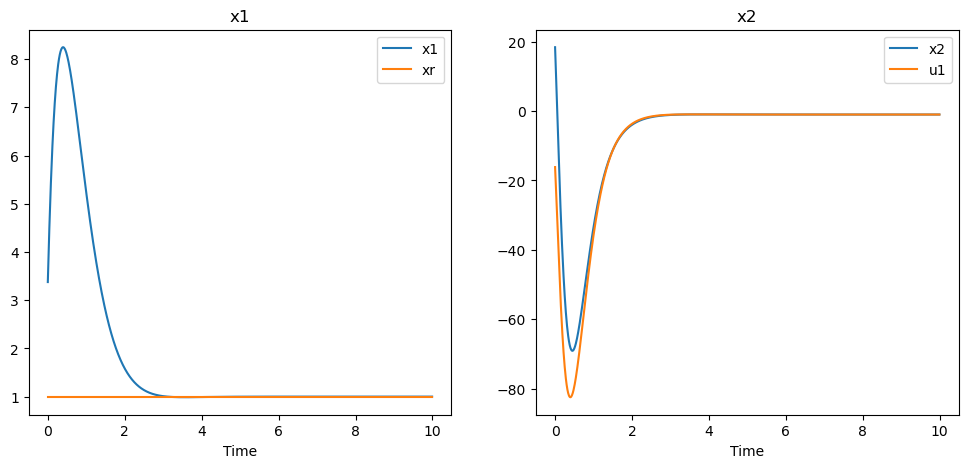

In [234]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("x1")
plt.xlabel("Time")
plt.plot(t,x1)
plt.plot(t,[xr]*len(t))
plt.legend(["x1", "xr"])

plt.subplot(1,2,2)
plt.title("x2")
plt.xlabel("Time")
plt.plot(t,x2)
plt.plot(t,u1)
plt.legend(["x2", "u1"])
plt.show()

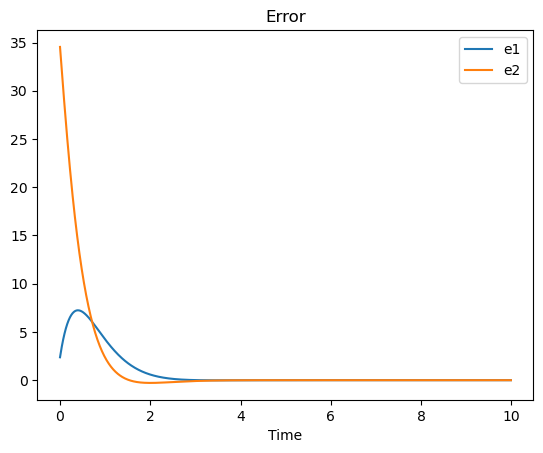

In [235]:
plt.title("Error")
plt.plot(t,e1)
plt.plot(t,e2)
plt.xlabel("Time")
plt.legend(["e1","e2"])
plt.show()

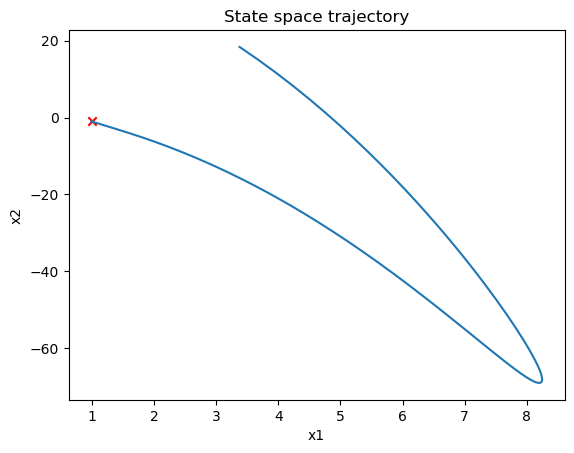

In [236]:
plt.title("State space trajectory")
plt.plot(x1,x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(x1[-1], x2[-1], c='r', marker='x')
plt.show()